<a href="https://colab.research.google.com/github/ShabnamShaikh2614/Churn-Prediction/blob/main/ChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Churn Prediction-** **Using logistic Regression**

**This project aim is to Predict the customer who are likely to cancel the subscription**

# **Parameters**


1.   Customer Id
2.   Age

1.   Gender
2.   Subscription type- Premium or basic

1.   Tenure-in month ( bought how many months subscription)
2.   Average Monthly usage
1.   Payment Method- Wallet,cash or Online
2.   Last Payment succefull

1.  Customer Support Calls
2.   Is active Last 30 days
1.   Churn: 1 yes , 0-No
















In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **1.Data Loading and Exploration**

Loaded the churndataset.csv file into a pandas DataFrame. Explored the data using .info() to understand the data types and non-null counts.

In [ ]:
#Read Data from csv file
churn_df=pd.read_csv('churndataset.csv')
#.info to show features
churn_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             500 non-null    object 
 1   Age                    500 non-null    int64  
 2   Gender                 500 non-null    object 
 3   SubscriptionType       500 non-null    object 
 4   Tenure                 500 non-null    int64  
 5   AverageMonthlyUsage    500 non-null    float64
 6   MonthlyFee             500 non-null    float64
 7   PaymentMethod          500 non-null    object 
 8   LastPaymentSuccessful  500 non-null    int64  
 9   CustomerSupportCalls   500 non-null    int64  
 10  IsActiveLast30Days     500 non-null    int64  
 11  Churn                  500 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 47.0+ KB


# **2.Data Processing-** Encode Categorical features

Encode categorial variables - like **Gender, subscription_type, payment method**

In [ ]:
# One-hot encode categorical features
churn_df_encoded = pd.get_dummies(churn_df, columns=['Gender','SubscriptionType','PaymentMethod'], drop_first=True)

In [ ]:
#Separate features (X) and target (Y) after one-hot encoding
X=churn_df_encoded.drop(['CustomerID','Churn'],axis=1)
Y=churn_df_encoded['Churn']

Normalize/Scale the features (Optional but helps)

In [ ]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# **3. Split Data**

Split Data into train/test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

# **4.Train Logistic Regression Model**

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

# **5.Make Predictions**

In [ ]:
y_pred=model.predict(X_test)

# **7.Evalutate the Model**

Evaluate model with matrix

In [ ]:
print("Accuracy:",accuracy_score(Y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,y_pred))
print("Classification Report:\n",classification_report(Y_test, y_pred))


Accuracy: 0.58
Confusion Matrix:
 [[33 19]
 [23 25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.63      0.61        52
           1       0.57      0.52      0.54        48

    accuracy                           0.58       100
   macro avg       0.58      0.58      0.58       100
weighted avg       0.58      0.58      0.58       100



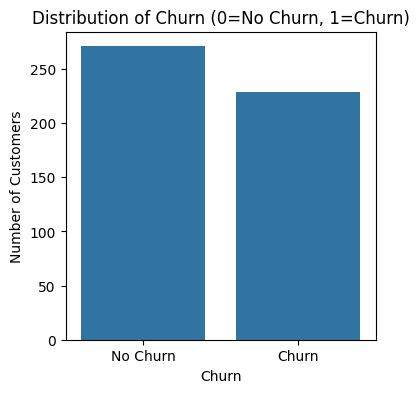

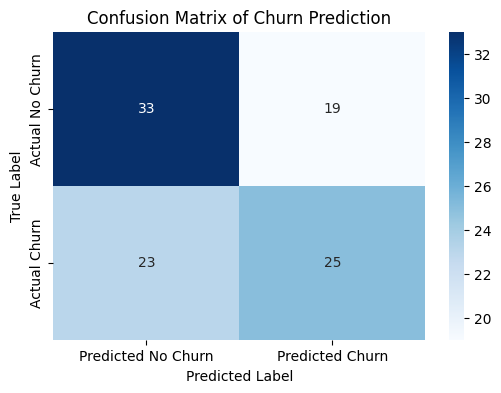

In [ ]:
# check how many customer are likely to churn the subscription

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(4, 4))
sns.countplot(x='Churn', data=churn_df)
plt.title('Distribution of Churn (0=No Churn, 1=Churn)')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.show()

# You can also visualize the predictions vs actuals
# First, let's add the predictions to the test set for visualization
y_pred_df = pd.DataFrame({'Actual Churn': Y_test, 'Predicted Churn': y_pred})

# Create a confusion matrix heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Churn', 'Predicted Churn'],
            yticklabels=['Actual No Churn', 'Actual Churn'])
plt.title('Confusion Matrix of Churn Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()